In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'phate>=1.0' distribution was not found and is required by the application


In [2]:
adata = ov.read('/home/lugli/spuccio/Projects/SP039/GBmap/Cai2024_Part1.h5ad')

In [9]:
adata = adata.raw.to_adata()

(15950, 2000)

In [18]:
adata = adata[:, adata.var.highly_variable_features]
adata

View of AnnData object with n_obs × n_vars = 15950 × 2000
    obs: 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'author', 'donor_id', 'batch', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3', 'n_cells-4', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca'
    obsp: 'connectivities', 'distances'

ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [19]:
ov.single.batch_correction(adata,batch_key='donor_id',
                                        methods='harmony',n_pcs=50)
adata

...Begin using harmony to correct batch effect


2025-03-31 16:14:43,035 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-31 16:14:49,729 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-31 16:14:49,777 - harmonypy - INFO - Iteration 1 of 10
2025-03-31 16:14:52,427 - harmonypy - INFO - Iteration 2 of 10
2025-03-31 16:14:55,079 - harmonypy - INFO - Iteration 3 of 10
2025-03-31 16:14:57,754 - harmonypy - INFO - Iteration 4 of 10
2025-03-31 16:15:00,524 - harmonypy - INFO - Converged after 4 iterations


AnnData object with n_obs × n_vars = 15950 × 2000
    obs: 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'author', 'donor_id', 'batch', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3', 'n_cells-4', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca', 'X_harmony'
    obsp: 'connectivities', 'distances'

In [20]:
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)


In [21]:
%%time
ov.pp.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:12)
CPU times: user 13.5 s, sys: 11.1 s, total: 24.6 s
Wall time: 12.5 s


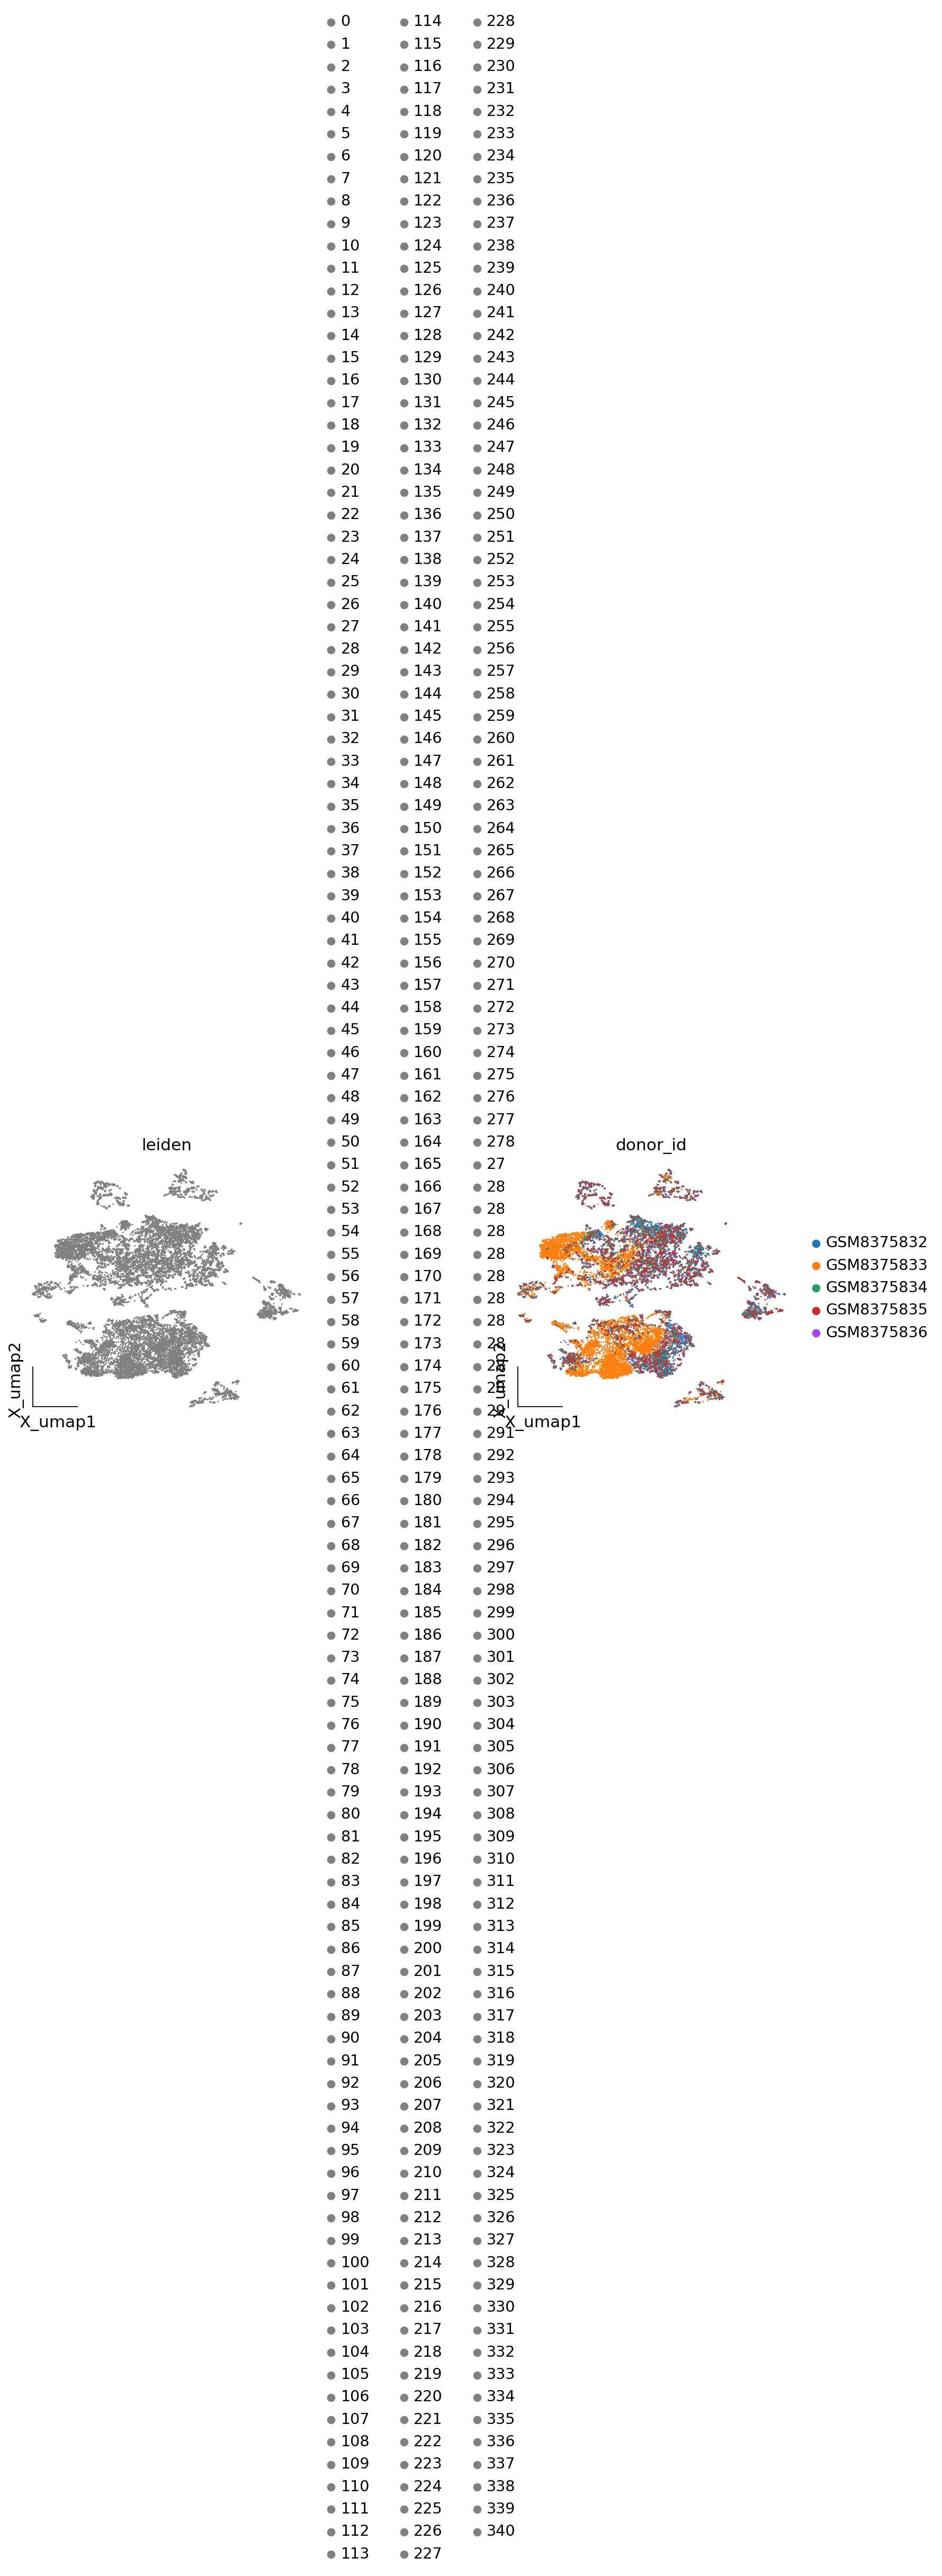

In [22]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [23]:
ov.pp.leiden(adata,resolution=0.5)

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


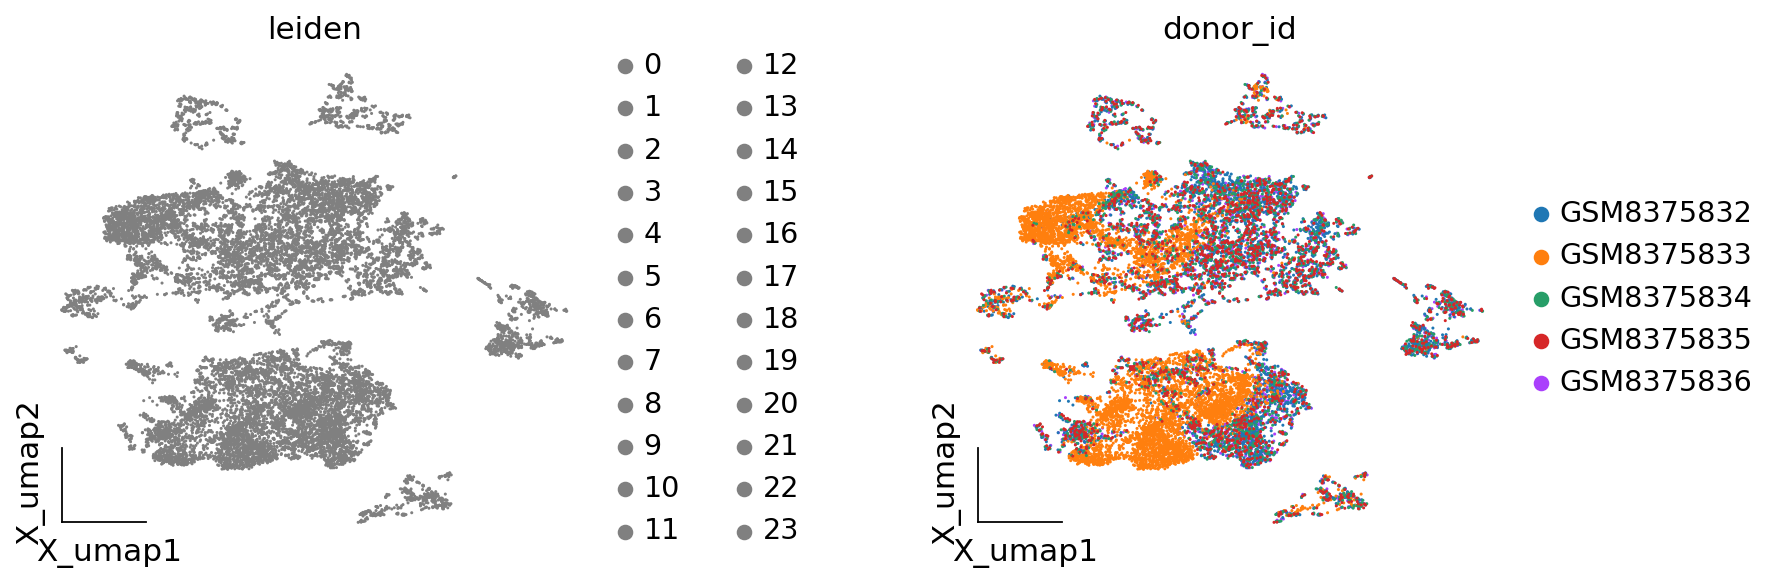

In [24]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [25]:
scsa=ov.single.pySCSA(adata=adata,
                      foldchange=1.5,
                      pvalue=0.01,
                      celltype='normal',
                      target='cellmarker',
                      tissue='Brain',
                      model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'                    
)

In [26]:
anno=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:00:03)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 448
Other Gene number: 569
Cluster 1 Gene number: 464
Other Gene number: 565
Cluster 10 Gene number: 268
Other Gene number: 569
Cluster 11 Gene number: 245
Other Gene number: 568
Cluster 12 Gene number: 357
Other Gene number: 569
Cluster 13 Gene number: 357
Other Gene number: 550
Cluster 14 Gene number: 312
Other Gene number: 541
Cluster 15 Gene number: 339
Other Gene number: 559
Cluster 16 Gene number: 353
Other Gene number: 569
Cluster 17 Gene number: 360
Other Gene number: 569
Cluster 18 Gene number: 438
Other Gene number: 569
Cluster 19 Gene number: 263
Other Gene nu

In [27]:
scsa.cell_auto_anno(adata,key='scsa_celltype_cellmarker')

...cell type added to scsa_celltype_cellmarker on obs of anndata


In [28]:
scsa=ov.single.pySCSA(adata=adata,
                          foldchange=1.5,
                          pvalue=0.01,
                          celltype='normal',
                          target='panglaodb',
                          tissue='Brain',
                          model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'
                          
)

In [29]:
res=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:00:04)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 448
Other Gene number: 1162
Cluster 1 Gene number: 464
Other Gene number: 1150
Cluster 10 Gene number: 268
Other Gene number: 1163
Cluster 11 Gene number: 245
Other Gene number: 1162
Cluster 12 Gene number: 357
Other Gene number: 1162
Cluster 13 Gene number: 357
Other Gene number: 1092
Cluster 14 Gene number: 312
Other Gene number: 1104
Cluster 15 Gene number: 339
Other Gene number: 1124
Cluster 16 Gene number: 353
Other Gene number: 1163
Cluster 17 Gene number: 360
Other Gene number: 1163
Cluster 18 Gene number: 438
Other Gene number: 1159
Cluster 19 Gene number: 263
Ot

In [30]:
scsa.cell_anno_print()

Cluster:0	Cell_type:Oligodendrocyte Progenitor Cells|Neural Stem/Precursor Cells	Z-score:3.057|2.957
Cluster:1	Cell_type:Fibroblasts|Müller Cells	Z-score:2.452|2.351
Cluster:2	Cell_type:Bergmann Glia|Osteoblasts	Z-score:2.591|2.526
Cluster:3	Cell_type:Microglia|Macrophages	Z-score:3.672|3.666
Cluster:4	Cell_type:Macrophages|Dendritic Cells	Z-score:4.034|4.024
Cluster:5	Cell_type:Microglia|Macrophages	Z-score:3.774|3.291
Cluster:6	Cell_type:Bergmann Glia|Neurons	Z-score:3.41|2.912
Cluster:7	Cell_type:Macrophages|Microglia	Z-score:3.627|3.204
Cluster:8	Cell_type:Dendritic Cells|Macrophages	Z-score:4.113|3.197
Cluster:9	Cell_type:Astrocytes|Schwann Cells	Z-score:4.016|3.553
Cluster:10	Cell_type:Dendritic Cells|Microglia	Z-score:3.937|3.465
Cluster:11	Cell_type:Bergmann Glia|Astrocytes	Z-score:3.782|2.656
Cluster:12	Cell_type:Oligodendrocytes|Schwann Cells	Z-score:7.725|4.173
Cluster:13	Cell_type:Pericytes|Smooth Muscle Cells	Z-score:3.878|3.135
Cluster:14	Cell_type:NK Cells|T Cells	Z-scor

In [31]:
scsa.cell_auto_anno(adata,key='scsa_celltype_panglaodb')

...cell type added to scsa_celltype_panglaodb on obs of anndata


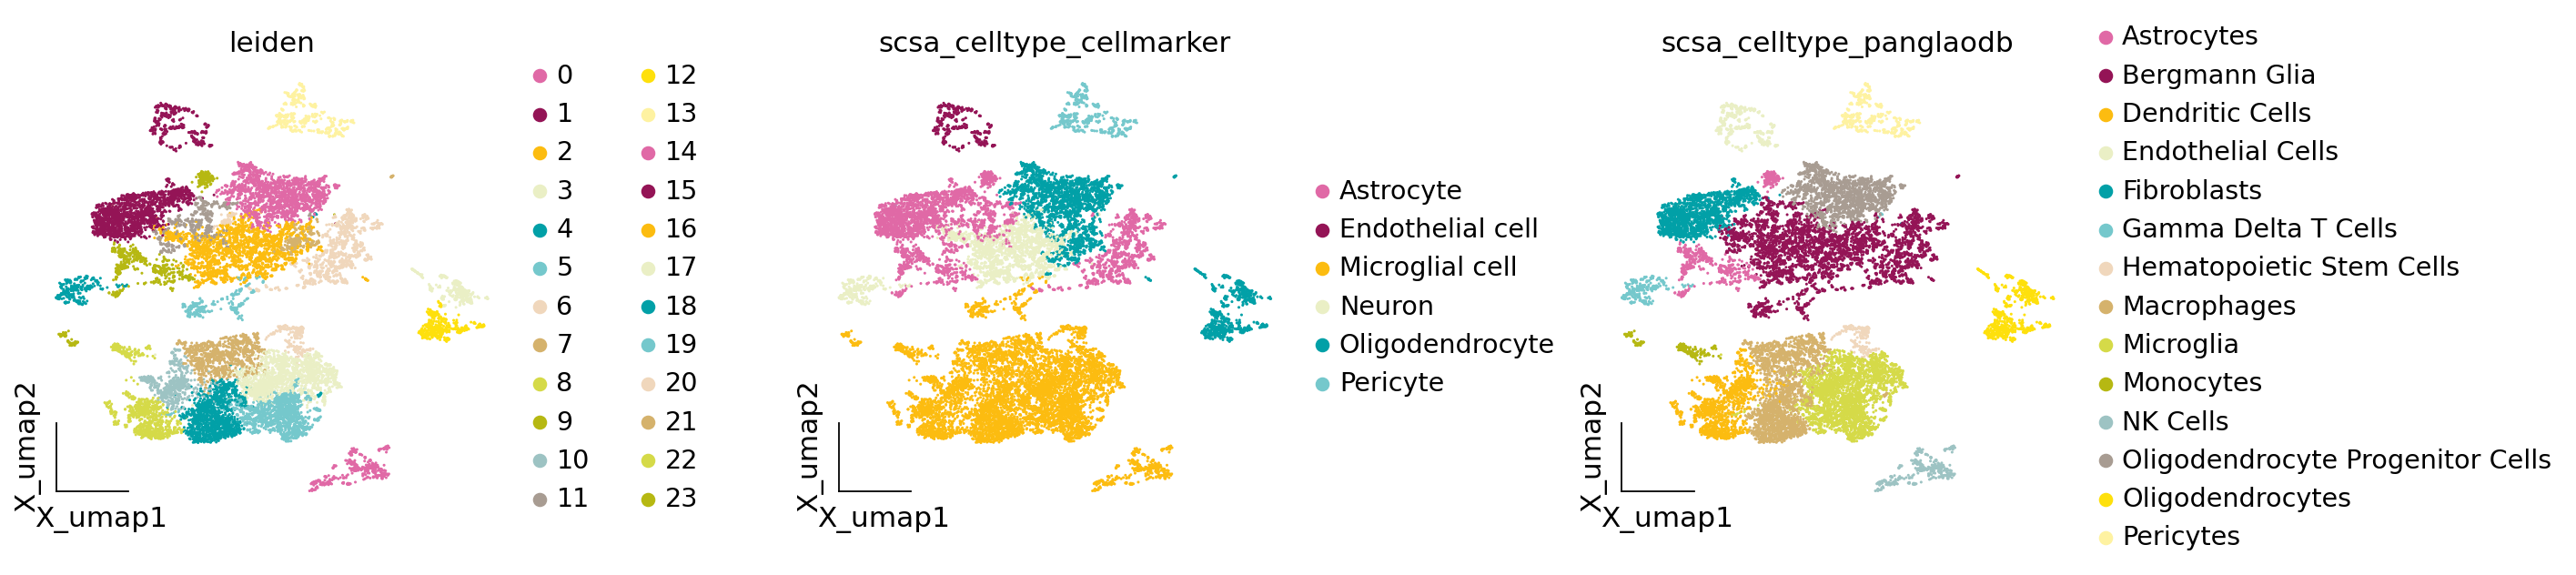

In [32]:
ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['leiden','scsa_celltype_cellmarker','scsa_celltype_panglaodb'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['annotation_level_1','annotation_level_2','annotation_level_3'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

In [33]:
adata

AnnData object with n_obs × n_vars = 15950 × 2000
    obs: 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'author', 'donor_id', 'batch', 'leiden', 'scsa_celltype_cellmarker', 'scsa_celltype_panglaodb'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3', 'n_cells-4', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap', 'rank_genes_groups', 'scsa_celltype_cellmarker_colors', 'scsa_celltype_panglaodb_colors'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca', 'X_harmony'
    obsp: 'connectivities', 'distances'

In [35]:
adata.write("/home/lugli/spuccio/Projects/SP039/GBmap/Cai2024_Part2.h5ad")

In [36]:
adata

AnnData object with n_obs × n_vars = 15950 × 2000
    obs: 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'author', 'donor_id', 'batch', 'leiden', 'scsa_celltype_cellmarker', 'scsa_celltype_panglaodb'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3', 'n_cells-4', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap', 'rank_genes_groups', 'scsa_celltype_cellmarker_colors', 'scsa_celltype_panglaodb_colors'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca', 'X_harmony'
    obsp: 'connectivities', 'distances'

In [37]:
part1 = ["Abdelfattah2022_Part1.h5ad","Cai2024_Part1.h5ad","Jacob2020_Part1.h5ad","JoyceGBmap_Part1.h5ad",
 "Lee2021_Part1.h5ad","Neftel2019_Part1.h5ad","Ravi2022_Part1.h5ad","Wang2019_Part1.h5ad",
 "Wu2020_Part1.h5ad", "Bhaduri2020_Part1.h5ad",
 "CarenzaGBmap_Part1.h5ad","Johnson2020_Part1.h5ad","LeBlanc2022_Part1.h5ad","Mathewson2021_Part1.h5ad",
 "Pombo2021_Part1.h5ad","Ruiz2022_Part1.h5ad","Wang2021_Part1.h5ad","Xie2021_Part1.h5ad"]

In [ ]:
part2= ["Abdelfattah2022_Part2.h5ad","Cai2024_Part2.h5ad","Chen2021_Part2.h5ad",
        "Darmanis2017_Part2.h5ad","Johnson2020_Part2.h5ad","LeBlanc2022_Part2.h5ad",
        "Neftel2019_Part2.h5ad","Ravi2022_Part2.h5ad","Wang2021_Part2.h5ad","Bhaduri2020_Part2.h5ad",
        "Carenza2023_Part2.h5ad","Couturier2020_Part2.h5ad","Jacob2020_Part2.h5ad",     JoyceGBmap_Part2.h5ad   Mathewson2021_Part2.h5ad  Pombo2021_Part2.h5ad   Wang2019_Part2.h5ad  Wu2020_Part2.h5ad